<b>July 16, 2025 • 05:52 PM</b>

# <b>📊 Data Science Assignment: Workforce Headcount Prediction</b>

<b>Linear Regression & Business Storytelling for CEO Presentation</b>

<hr>

## <b>🎯 Mission Brief</b>
> You are a data science consultant presentation to the CEO
Your analysis will directly impact budget allocation, hiring strategy, and board presentations. The CEO needs reliable workforce predictions with clear business implications.

### <b>French's Challenge</b>
Build a linear regression model to predict daily Group A workforce from June 17 to July 31, 2025, and create a CEO-ready presentation with compelling data storytelling

<hr>

### <b>📋 Assignment Overview</b>
#### <b>Problem Statement</b>
Predict daily Group A workforce headcount using linear regression and present findings to CEO for strategic planning.

#### <b>Known Facts</b>
* <b>Current baseline</b>: 3,733 Group A professionals (June 16, 2025, 11:15 AM)
* <b>Prediction period</b>: June 17 - July 31, 2025 (45 days)
* <b>Stakeholder</b>: CEO (non-technical, results-focused)

<hr>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# show all columns
#pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("professional_log_raw.csv")
df

,professional_id,onboarding_date,professional_group,layoff_date,last_active_date,birthday
0,9635,2024-01-01 15:32:14,A,NaN,2025-05-29 12:46:18,1973-03-09
1,9663,2024-01-01 16:12:16,C,NaN,2024-03-21 14:00:17,2001-10-08
2,9679,2024-01-03 15:18:53,ปลดแล้ว,2024-06-03 14:00:15,2024-06-03 14:00:15,1977-07-25
3,9677,2024-01-03 15:27:33,C,NaN,2024-03-24 14:00:15,1982-08-10
4,9675,2024-01-03 15:34:47,A,NaN,2025-06-14 06:32:16,1974-09-11
...,...,...,...,...,...,...
2625,12909,2025-06-14 09:31:25,A,NaN,2025-06-15 21:08:51,1974-09-05
2626,12762,2025-06-14 10:58:26,A,NaN,2025-06-14 10:58:26,1971-02-07
2627,12901,2025-06-15 08:48:03,A,NaN,2025-06-16 08:23:01,1980-05-27
2628,12872,2025-06-15 13:39:48,A,NaN,2025-06-15 13:39:48,1995-02-01


### 📊 <b>Dataset</b>
professional_log_raw Contains:
* `professional_id` - Unique identifier
* `onboarding_date` - Join date
* `professional_group` - Focus on Group 'A'
* `layoff_date` - Official termination (if any)
* `last_active_date` - Last activity recorded
* `birthday` - Birth dates ⚠ Mixed Buddhist/Christian Era
> Data Challenge: Birthday column mixes Buddhist Era (พุทธศักราช) and Christian Era (คริสต์ศักราช)
Buddhist Era years are ~543 years ahead: 2567 BE = 2024 CE

<hr>

### 🎯 <b>Learning Objectives</b>
#### <b>Technical Skills</b>
<pre>
☑ <b>Manual Data Exploration</b> - Detective work without automated tools

☑ <b>Data Cleaning Mastery</b> - Handle real-world messy data

☑ <b>Linear Regression Progression</b> - Simple → Multiple → Validation

☑ <b>Business Visualization</b> - CEO-worthy charts and insights
</pre>
#### <b>Professional Skills</b>
<pre>
☑ <b>Data Storytelling</b> - Transform numbers into business narrative

☑ <b>Executive Communication</b> - Present to C-level audience

☑ <b>Business Thinking</b> - Connect stats to strategic decisions
</pre>
<hr>

### 📚 <b>5-Day Learning Journey

# 📆 <b>Day 1: Data Detective Work</b>

🔍 Step 1: Manual Data Exploration</b>

_No automated EDA tools - build your detective skills!_

<b>Your Investigation Questions</b>:


In [3]:
# Start your investigation
print("🔍 DATASET INVESTIGATION")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Answer these manually
# 1. How many Group A professionals?
# 2. Date range of data?
# 3. Data quality red flags?
# 4. Missing data patterns

🔍 DATASET INVESTIGATION
Shape: (2630, 6)
Columns: ['professional_id', 'onboarding_date', 'professional_group', 'layoff_date', 'last_active_date', 'birthday']


<b>Manual Techniques to Use</b>:
* `.value_counts()`, `.describe()`, `.info()` strategically
* Simple plots to spot patterns
* Calculate percentages manually
* Hunt for outliers by hand
> 💡 Learning Goal: Develop data intuition without automated tools

<b>1. How many Group A professionals?</b>

In [4]:
print(f"Total Group A professionals: {df[df["professional_group"] == "A"].shape[0]}")

Total Group A professionals: 1217


<b>2. Date range of data?</b>

In [5]:
print(f"Data Date Range: {df['onboarding_date'].min()} to {df['last_active_date'].max()}")

Data Date Range: 2024-01-01 15:32:14 to 2025-06-16 10:41:23


<b>3. Data quality red flags?</b>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   professional_id     2630 non-null   int64 
 1   onboarding_date     2630 non-null   object
 2   professional_group  2630 non-null   object
 3   layoff_date         351 non-null    object
 4   last_active_date    2630 non-null   object
 5   birthday            2630 non-null   object
dtypes: int64(1), object(5)
memory usage: 123.4+ KB


In [7]:
from scipy import stats

def data_quality_check(df: pd.DataFrame) -> dict:
    """
    Performs a series of basic data quality checks on a pandas DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame to check.

    Returns:
        dict: A dictionary containing the results of various data quality checks.
    """
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Input must be a pandas DataFrame.")
    if df.empty:
        print("Warning: The DataFrame is empty.")
        return {"summary": "DataFrame is empty, no checks performed."}

    results = {}

    print("--- Starting Data Quality Checks ---")
    print(f"DataFrame Shape: {df.shape}")
    print(f"Column Names: {df.columns.tolist()}")
    print("\n")

    # 1. Check for Missing Values (NaN)
    print("1. Checking for Missing Values...")
    missing_values = df.isnull().sum()
    missing_percentage = (df.isnull().sum() / len(df)) * 100
    missing_info = pd.DataFrame({
        'Missing Count': missing_values,
        'Missing Percentage': missing_percentage
    })
    missing_info = missing_info[missing_info['Missing Count'] > 0]
    if not missing_info.empty:
        results['missing_values'] = missing_info.to_dict('index')
        print("   Missing values found in the following columns:")
        print(missing_info)
    else:
        results['missing_values'] = "No missing values found."
        print("   No missing values found.")
    print("\n")

    # 2. Check for Duplicate Rows
    print("2. Checking for Duplicate Rows...")
    duplicate_rows_count = df.duplicated().sum()
    if duplicate_rows_count > 0:
        results['duplicate_rows'] = duplicate_rows_count
        print(f"   {duplicate_rows_count} duplicate rows found.")
        # Optionally, show some duplicate rows
        # print("   Example duplicate rows (first 5):")
        # print(df[df.duplicated()].head())
    else:
        results['duplicate_rows'] = "No duplicate rows found."
        print("   No duplicate rows found.")
    print("\n")

    # 3. Check Data Types
    print("3. Checking Data Types...")
    data_types = df.dtypes.apply(lambda x: str(x)).to_dict()
    results['data_types'] = data_types
    print("   Current Data Types:")
    print(df.dtypes)
    print("\n")

    # 4. Check Unique Values for Categorical/Object Columns
    print("4. Checking Unique Values for Categorical Columns...")
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    unique_counts = {}
    if not categorical_cols.empty:
        for col in categorical_cols:
            num_unique = df[col].nunique()
            unique_counts[col] = num_unique
            print(f"   Column '{col}': {num_unique} unique values.")
            if num_unique < 20 and num_unique > 0: # Print unique values if not too many
                print(f"     Unique values: {df[col].unique().tolist()}")
        results['unique_categorical_values'] = unique_counts
    else:
        results['unique_categorical_values'] = "No categorical columns found."
        print("   No categorical columns found.")
    print("\n")

    # 5. Simple Outlier Detection (for numerical columns using Z-score)
    print("5. Performing Simple Outlier Detection (Z-score)...")
    numerical_cols = df.select_dtypes(include=np.number).columns
    outlier_info = {}
    if not numerical_cols.empty:
        for col in numerical_cols:
            if df[col].nunique() > 1: # Only check if there's variation
                # Calculate Z-scores
                z_scores = np.abs(stats.zscore(df[col].dropna()))
                # Define a threshold for outliers (e.g., Z-score > 3)
                threshold = 3
                outliers = df[col].dropna()[z_scores > threshold]
                if not outliers.empty:
                    outlier_info[col] = {
                        'count': len(outliers),
                        'values': outliers.tolist()
                    }
                    print(f"   Column '{col}': {len(outliers)} potential outliers found (Z-score > {threshold}).")
                    # print(f"     Example outliers: {outliers.head().tolist()}")
                else:
                    print(f"   Column '{col}': No significant outliers found (Z-score > {threshold}).")
            else:
                print(f"   Column '{col}': Not enough variation for outlier detection.")
        if outlier_info:
            results['outliers'] = outlier_info
        else:
            results['outliers'] = "No significant outliers detected."
    else:
        results['outliers'] = "No numerical columns found for outlier detection."
    print("\n")

    print("--- Data Quality Checks Complete ---")
    return results

In [8]:
# Run the quality check
quality_report = data_quality_check(df.copy()) # Use a copy to avoid modifying original df
print("\n" + "="*50 + "\n")
print("Summary of Data Quality Report:")
for key, value in quality_report.items():
    print(f"- {key}:")
    if isinstance(value, dict):
        for sub_key, sub_value in value.items():
            if isinstance(sub_value, dict):
                print(f"  - {sub_key}: {sub_value}")
            else:
                print(f"  - {sub_key}: {sub_value}")
    else:
        print(f"  {value}")

--- Starting Data Quality Checks ---
DataFrame Shape: (2630, 6)
Column Names: ['professional_id', 'onboarding_date', 'professional_group', 'layoff_date', 'last_active_date', 'birthday']


1. Checking for Missing Values...
   Missing values found in the following columns:
             Missing Count  Missing Percentage
layoff_date           2279           86.653992


2. Checking for Duplicate Rows...
   No duplicate rows found.


3. Checking Data Types...
   Current Data Types:
professional_id        int64
onboarding_date       object
professional_group    object
layoff_date           object
last_active_date      object
birthday              object
dtype: object


4. Checking Unique Values for Categorical Columns...
   Column 'onboarding_date': 2630 unique values.
   Column 'professional_group': 5 unique values.
     Unique values: ['A', 'C', 'ปลดแล้ว', 'H', '0']
   Column 'layoff_date': 336 unique values.
   Column 'last_active_date': 1752 unique values.
   Column 'birthday': 2294 uniqu

<b>4. Missing data patterns?</b>

In [9]:
import plotly.express as px
def plot_missing_data(df: pd.DataFrame):
    """
    Plots a heatmap of missing data in the DataFrame.
    
    Args:
        df (pd.DataFrame): The input DataFrame to visualize missing data.
    """
    # Create a boolean mask for moissing values
    missing_mask = df.isnull()
    # Convert boolean to int for plotting (1=missing, 0=present)
    missing_int = missing_mask.astype(int)
    # Use a bald color for missing values (e.g., red)
    fig = px.imshow(
          missing_int,
          color_continuous_scale=[(0, "white"), (1, "red")],
          aspect="auto",
          labels=dict(x="Columns", y="Rows", color="Missing"),
          title="Missing Data Heatmap Patterns"
    )
    fig.update_traces(showscale=False)
    fig.show()

In [10]:
plot_missing_data(df)

Can't really see the patterns yet. Since the layoff_date on each rows didn't sorted by date

#### 📅 <b>Step 2: The Buddhist Era Challeng</b>
_Real-world data cleaning problem_

<b>My Mission:</b>

In [11]:
print("Before cleaning:")
print(f"{df["birthday"].min()} to {df["birthday"].max()}")

Before cleaning:
0000-00-00 to 2520-10-16


In [12]:
df[df["birthday"] < "1950-01-01"]

,professional_id,onboarding_date,professional_group,layoff_date,last_active_date,birthday
1424,11362,2024-09-06 08:45:27,A,NaN,2024-12-28 08:30:01,0000-00-00


In [13]:
df[df["birthday"] > "2050-01-01"]

,professional_id,onboarding_date,professional_group,layoff_date,last_active_date,birthday
1253,11138,2024-08-03 09:00:55,H,NaN,2025-03-03 14:35:20,2512-10-29
2549,12793,2025-05-30 13:38:44,A,NaN,2025-06-16 09:15:36,2520-10-16


In [14]:
def clean_mixed_era_dates(date_series):
    """
    Detective work: Find the pattern and fix it
    Hint: Years > 2100 = Buddhist Era
    Convert: CE_year = BE_year - 543
    """
    cleaned_dates = []
    for date in date_series:
        if date == "0000-00-00" or not isinstance(date, str):
            cleaned_dates.append(date)  # leave invalid or placeholder dates unchanged
            continue

        parts = date.split('-')
        if len(parts) != 3:
            cleaned_dates.append(date)  # invalid format
            continue

        year, month, day = parts

        try:
            year_int = int(year)
            if year_int > 2100:  # likely BE
                year_int -= 543
            if 1950 <= year_int <= 2005:
                cleaned_date = f"{year_int:04d}-{month}-{day}"
                cleaned_dates.append(cleaned_date)
            else:
                cleaned_dates.append(date)  # out of valid range
        except ValueError:
            cleaned_dates.append(date)  # non-numeric year

    return pd.Series(cleaned_dates)
    
# Validation: Birth years should be 1950-2005 range

In [15]:
df["birthday"] = clean_mixed_era_dates(df["birthday"])

print("After cleaning:")
print(f"{df['birthday'].min()} to {df['birthday'].max()}")

After cleaning:
0000-00-00 to 2019-12-14


In [16]:
df[df["professional_id"] == 11362]

,professional_id,onboarding_date,professional_group,layoff_date,last_active_date,birthday
1424,11362,2024-09-06 08:45:27,A,NaN,2024-12-28 08:30:01,0000-00-00


In [17]:
df[df["professional_id"] == 11138]

,professional_id,onboarding_date,professional_group,layoff_date,last_active_date,birthday
1253,11138,2024-08-03 09:00:55,H,NaN,2025-03-03 14:35:20,1969-10-29


In [18]:
df[df["professional_id"] == 12793]

,professional_id,onboarding_date,professional_group,layoff_date,last_active_date,birthday
2549,12793,2025-05-30 13:38:44,A,NaN,2025-06-16 09:15:36,1977-10-16


In [19]:
df[df["birthday"] < "1950-01-01"]

,professional_id,onboarding_date,professional_group,layoff_date,last_active_date,birthday
1424,11362,2024-09-06 08:45:27,A,NaN,2024-12-28 08:30:01,0000-00-00


> 💡 Learning Goal: Handle real-world date inconsistencies common in Asian datasets

#### ⚖️ <b>Step 3: Business Logic Translation</b>
_Code the business rules_

<b>Business Rule</b>: "Active professional on any date"
* Joined on/before that date AND
* No departure OR departed after that date

<b>Your Implemention:</b>

In [20]:
df.head()

,professional_id,onboarding_date,professional_group,layoff_date,last_active_date,birthday
0,9635,2024-01-01 15:32:14,A,NaN,2025-05-29 12:46:18,1973-03-09
1,9663,2024-01-01 16:12:16,C,NaN,2024-03-21 14:00:17,2001-10-08
2,9679,2024-01-03 15:18:53,ปลดแล้ว,2024-06-03 14:00:15,2024-06-03 14:00:15,1977-07-25
3,9677,2024-01-03 15:27:33,C,NaN,2024-03-24 14:00:15,1982-08-10
4,9675,2024-01-03 15:34:47,A,NaN,2025-06-14 06:32:16,1974-09-11


In [21]:
# target_date to datetime
target_date = pd.to_datetime("2025-06-16")

# Apply datetime to other columns as well
df["onboarding_date"] = pd.to_datetime(df["onboarding_date"], errors="coerce")
df["layoff_date"] = pd.to_datetime(df["layoff_date"], errors="coerce")
df["last_active_date"] = pd.to_datetime(df["last_active_date"], errors="coerce")

In [22]:
def is_active_on_date(row, target_date):
    """
    Group A: Use layoff_date if available
    Others: Use last_active_date as departure
    """
    # My business logic here
    if row["onboarding_date"] > target_date:
        return False # Not join yet or join after target date
    
    if row["professional_group"] == "A":
        return pd.isna(row["layoff_date"]) or row["layoff_date"] > target_date
    else:
        return pd.isna(row["last_active_date"]) or row["last_active_date"] > target_date

🎯 <b>Validation Test</b>: Should return 3,733 for June 16, 2025

In [23]:
# Count active professionals on target_date
active_count = df.apply(lambda row: is_active_on_date(row, target_date), axis=1).sum()
print("Active professionals on 2025-06-16:", active_count)

Active professionals on 2025-06-16: 1219


<hr>

# 📆 <b>Day 2: Business Logic Implementation</b>
#### 📈 <b>Step 4: Historical Headcount Calculation</b>
_Validate my business logic_

<b>Your Task</b>: Create daily headcount for last 60 days

In [24]:
df.tail()

,professional_id,onboarding_date,professional_group,layoff_date,last_active_date,birthday
2625,12909,2025-06-14 09:31:25,A,NaT,2025-06-15 21:08:51,1974-09-05
2626,12762,2025-06-14 10:58:26,A,NaT,2025-06-14 10:58:26,1971-02-07
2627,12901,2025-06-15 08:48:03,A,NaT,2025-06-16 08:23:01,1980-05-27
2628,12872,2025-06-15 13:39:48,A,NaT,2025-06-15 13:39:48,1995-02-01
2629,12905,2025-06-15 17:08:14,A,NaT,2025-06-15 17:08:14,1983-12-03


In [25]:
def calculate_daily_headcount(df, start_date, end_date):
    """
    Calculate active Group A count for each day
    Validate against known baseline: 3,733
    """
# Code implementation
    # Only counts professionals in Group A
    # Calculate active (Group A) count for each day between "start_date" and "end_date" (inclusive).
    date_range = pd.date_range(start=start_date, end=end_date, freq="D")
    headcounts = []
    
    for current_date in date_range:
        count = df.apply(lambda row: (
            row["professional_group"] == "A" and
            row["onboarding_date"] <= current_date and
            (pd.isna(row["layoff_date"]) or row["layoff_date"] > current_date) 
        ), axis=1).sum()
        headcounts.append(count)
        
    return pd.Series(headcounts, index=date_range, name="Group_A_Headcount")

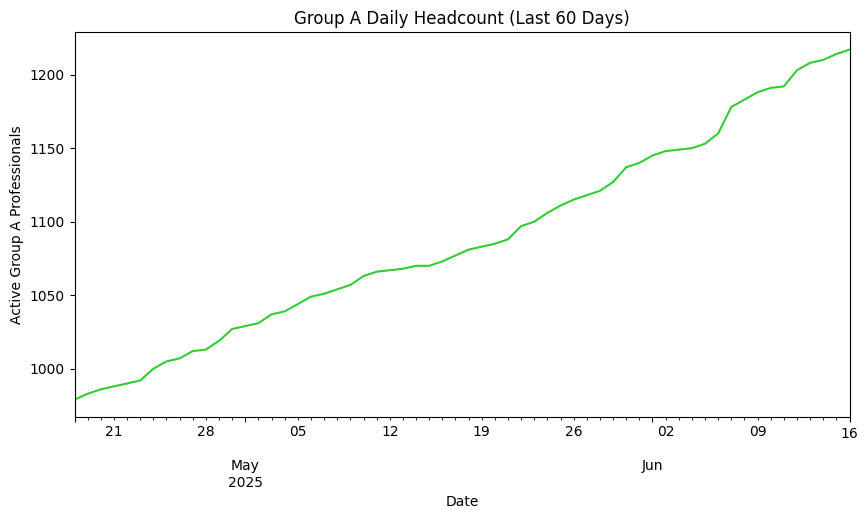

In [26]:
# Calculate daily headcount for the last 60 days up to the target_date
start_date = target_date - pd.Timedelta(days=59)
end_date = target_date

daily_headcount = calculate_daily_headcount(df, start_date, end_date)
daily_headcount.plot(color="limegreen", title="Group A Daily Headcount (Last 60 Days)", ylabel="Active Group A Professionals", xlabel="Date", figsize=(10, 5))
plt.show()

#### 📊 <b>Step 5: Pattern Recognition</b>
_Find the business rhythms_

<b>Questions to Explore:</b>
* What's the average daily change?
* Are weekdays different from weekends?
* Month-end/start patterns?
* Typical volatility range?

<b>Manual Analysis Tasks:</b>
* Plot historical trends
* Calculate daily changes
* Identify outliers
* Spot seasonal patterns

<hr>


In [27]:
# Calculate daily changes
daily_change = daily_headcount.diff().fillna(0)

# Add weekday info
daily_df = daily_headcount.to_frame().rename(columns={"Group_A_Headcount": "headcount"})
daily_df["change"] = daily_change
daily_df["weekday"] = daily_df.index.day_name()
daily_df["day"] = daily_df.index.day

# Average daily change
avg_change = daily_df["change"].mean()
print(f"Average daily change: {avg_change:.2f}")

# Volatility (standard deviation)
volatility = daily_df["change"].std()
print(f"Typical volatility (std): {volatility:.2f}")

# Plot headcount trend
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_df.index, y=daily_df["headcount"], mode='lines+markers', name='Headcount', line=dict(color="limegreen", width=2), marker=dict(size=5, color="green")))
fig.add_trace(go.Bar(x=daily_df.index, y=daily_df["change"], name='Daily Change', marker_color='orange', opacity=0.3, yaxis='y2'))

fig.update_layout(
    title="Group A Headcount & Daily Change",
    xaxis_title="Date",
    yaxis=dict(title="Headcount"),
    yaxis2=dict(title="Daily Change", overlaying='y', side='right', showgrid=False),
    legend=dict(x=0.01, y=0.99)
)
fig.show()


# Weekday vs Weekend analysis
weekday_avg = daily_df.groupby("weekday")["change"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Use a bold color for weekdays and a different, less prominent color for weekends
colors = ['royalblue'] * 5 + ['orange', 'orange']  # Weekdays: blue, Weekends: orange

fig2 = px.bar(
    weekday_avg,
    title="Average Daily Change by Weekday",
    labels={"value": "Avg Change", "weekday": "Weekday"},
    color=weekday_avg.index,  # Use weekday as color
    color_discrete_sequence=colors
)
fig2.update_traces(marker_line_color='black', marker_line_width=1.5)
fig2.update_layout(showlegend=False)
fig2.show()


# Month start/end pattern
daily_df["month"] = daily_df.index.month
month_start = daily_df[daily_df["day"] <= 3].groupby("month")["change"].mean()
month_end = daily_df[daily_df["day"] >= 28].groupby("month")["change"].mean()

fig3 = go.Figure()
fig3.add_trace(go.Bar(
    x=month_start.index, 
    y=month_start, 
    name="Month Start (1-3)",
    marker_color='orange'
))
fig3.add_trace(go.Bar(
    x=month_end.index, 
    y=month_end, 
    name="Month End (28+)",
    marker_color='green'
))
fig3.update_layout(
    title="Avg Daily Change: Month Start vs End",
    xaxis_title="Month",
    yaxis_title="Avg Change"
)
fig3.show()


# Outlier detection (change > 2 std)
outlier_threshold = 2 * volatility
outliers = daily_df[abs(daily_df["change"]) > outlier_threshold]
print("Outlier days (|change| > 2 std):")
print(outliers[["change"]])

Average daily change: 3.97
Typical volatility (std): 2.98


Outlier days (|change| > 2 std):
            change
2025-04-24     8.0
2025-04-29     6.0
2025-04-30     8.0
2025-05-03     6.0
2025-05-10     6.0
2025-05-22     9.0
2025-05-24     6.0
2025-05-29     6.0
2025-05-30    10.0
2025-06-06     7.0
2025-06-07    18.0
2025-06-12    11.0


# 📅 <b>Day 3: Linear Regression Journey</b>
#### 📈 <b>Step 6: Start Simple - Univariate</b>
_Build intuition first_

<b>Simple Question</b>: "Does day of week predict headcount?"

In [46]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/10.7 MB 11.3 MB/s eta 0:00:01
   -------------- ------------------------- 3.9/10.7 MB 9.3 MB/s eta 0:00:01
   -------------------- ------------------- 5.5/10.7 MB 8.5 MB/s eta 0:00:01
   -------------------------- ------------- 7.1/10.7 MB 9.3 MB/s eta 0:00:01
   ----------------------------------- ---- 9.4/10.7 MB 8.9 MB/s eta 0:00:01
   ---------------------------------------  10.5/10.7 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 7.8 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from sklearn.linear_model import LinearRegression

"""
# Model 1: Simple
x = day_of_week (0-6)
y = daily_headcount

# Analyze:# - What's the R² score?
#             Which day has highest predicted headcount?
#             How big are residuals?
"""

# Encode weekday as integer (Monday=0, ..., Sunday=6)
X = daily_df['weekday'].map({
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
}).values.reshape(-1, 1)
y = daily_df['headcount'].values

# Fit linear regression
model = LinearRegression()
model.fit(X, y)

# R² score
r2 = model.score(X, y)
print(f"R² score: {r2:.4f}")

# Predict headcount for each day of week
weekdays = np.arange(7).reshape(-1, 1)
predicted = model.predict(weekdays)
for i, val in enumerate(predicted):
    print(f"{['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'][i]}: {val:.1f}")

# Which day has highest predicted headcount?
max_idx = np.argmax(predicted)
print(f"Highest predicted headcount: {['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'][max_idx]} ({predicted[max_idx]:.1f})")

# Residuals
residuals = y - model.predict(X)
print(f"Residuals: mean={residuals.mean():.2f}, std={residuals.std():.2f}, max={residuals.max():.2f}, min={residuals.min():.2f}")

R² score: 0.0000
Monday: 1089.3
Tuesday: 1089.3
Wednesday: 1089.2
Thursday: 1089.1
Friday: 1089.0
Saturday: 1088.9
Sunday: 1088.8
Highest predicted headcount: Monday (1089.3)
Residuals: mean=0.00, std=68.64, max=127.66, min=-109.98


#### 📊 <b>Step 7: Progress to Multiple Regression</b>
_Add complexity gradually_

<b>Feature Progression:</b>

In [29]:
# Model 1: Basic
features_v1 = ["day_of_week"]

# Model 2: Business calendar
features_v2 = ["day_of_week", "is_weeekend", "is_month_start"]

# Model 3: Advanced patterns
features_v3 = features_v2 + ["sin_day_of_week", "previous_day_count"]

# Compare R² - which features help most?

<b>Model 1: Basic</b>

In [30]:
# Prepare features for Model 1: Basic (day_of_week as integer)
daily_df["day_of_week"] = daily_df["weekday"].map({
    'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3,
    'Friday': 4, 'Saturday': 5, 'Sunday': 6
})

X_v1 = daily_df[["day_of_week"]].values
y_v1 = daily_df["headcount"].values

model_v1 = LinearRegression()
model_v1.fit(X_v1, y_v1)
r2_v1 = model_v1.score(X_v1, y_v1)
print(f"Model 1 (day_of_week) R²: {r2_v1:.4f}")

Model 1 (day_of_week) R²: 0.0000


<b>Model 2: Business calendar</b>

In [31]:
# Add features for Model 2: Business calendar
daily_df["is_weekend"] = daily_df["day_of_week"].isin([5, 6]).astype(int)
daily_df["is_month_start"] = (daily_df["day"] <= 3).astype(int)

X_v2 = daily_df[["day_of_week", "is_weekend", "is_month_start"]].values
y_v2 = daily_df["headcount"].values

model_v2 = LinearRegression()
model_v2.fit(X_v2, y_v2)
r2_v2 = model_v2.score(X_v2, y_v2)
print(f"Model 2 (day_of_week, is_weekend, is_month_start) R²: {r2_v2:.4f}")

Model 2 (day_of_week, is_weekend, is_month_start) R²: 0.0011


<b>Model 3: Advanced patterns</b>

In [32]:
# Add advanced features for Model 3
# 1. Sine transformation for day_of_week (cyclical encoding)
daily_df["sin_day_of_week"] = np.sin(2 * np.pi * daily_df["day_of_week"] / 7)

# 2. Previous day's headcount (shifted by 1)
daily_df["previous_day_count"] = daily_df["headcount"].shift(1)
# For the first row, fill missing previous_day_count with the same value as headcount
daily_df["previous_day_count"].fillna(daily_df["headcount"], inplace=True)

# Prepare features for Model 3
X_v3 = daily_df[["day_of_week", "is_weekend", "is_month_start", "sin_day_of_week", "previous_day_count"]].values
y_v3 = daily_df["headcount"].values

model_v3 = LinearRegression()
model_v3.fit(X_v3, y_v3)
r2_v3 = model_v3.score(X_v3, y_v3)
print(f"Model 3 (advanced features) R²: {r2_v3:.4f}")

Model 3 (advanced features) R²: 0.9984


<b>R-squared Theory:</b>

* A value of 0 indicates that the response variable cannot be explained by the predictor variable at all. 
* A value of 1 indicates that the response variable can be perfectly explained without error by the predictor variable.

In practice, you will likely never see a value of 0 or 1 for R-squared.

In [33]:
print("Model R² comparison:")
print(f"Model 1 (day_of_week): {r2_v1:.4f}")
print(f"Model 2 (day_of_week, is_weekend, is_month_start): {r2_v2:.4f}")
print(f"Model 3 (advanced features): {r2_v3:.4f}")

if r2_v3 > r2_v2 > r2_v1:
    print("\nAdding more business calendar features (weekend, month start) gives a small improvement, but adding advanced features (sin_day_of_week, previous_day_count) dramatically increases R². The most helpful feature is previous day's headcount, capturing strong temporal continuity in workforce numbers.")

Model R² comparison:
Model 1 (day_of_week): 0.0000
Model 2 (day_of_week, is_weekend, is_month_start): 0.0011
Model 3 (advanced features): 0.9984

Adding more business calendar features (weekend, month start) gives a small improvement, but adding advanced features (sin_day_of_week, previous_day_count) dramatically increases R². The most helpful feature is previous day's headcount, capturing strong temporal continuity in workforce numbers.


#### ✅ <b>Step 8: Validation & Reality Check</b>
_Ensure business sense_

In [34]:
from sklearn.model_selection import train_test_split

# Time-aware split (important!)

# Train: First 70% of days
# Test: Last 30% of days

# Reality checks:
#     - Reasonable predictions? (no negatives!)
#     - Sensible daily charges? (±50 max)
#     - Weekend patterns logical?

# Time-aware split for Model 2 (Business calendar features)
n = len(X_v2)
split_idx = int(n * 0.7)

X_train, X_test = X_v2[:split_idx], X_v2[split_idx:]
y_train, y_test = y_v2[:split_idx], y_v2[split_idx:]

# Fit model on training set
model_v2 = LinearRegression()
model_v2.fit(X_train, y_train)

# Predict on test set
y_pred = model_v2.predict(X_test)

# Reality checks
print("Min predicted:", y_pred.min())
print("Max predicted:", y_pred.max())
print("Any negatives?", (y_pred < 0).any())
print("Max daily change in predictions:", np.abs(np.diff(y_pred)).max())

# Weekend pattern check
weekend_idx = X_test[:, 1] == 1
print("Mean prediction (weekend):", y_pred[weekend_idx].mean())
print("Mean prediction (weekday):", y_pred[~weekend_idx].mean())

Min predicted: 1028.4435245416914
Max predicted: 1055.661147250148
Any negatives? False
Max daily change in predictions: 20.750739207569495
Mean prediction (weekend): 1045.630445495762
Mean prediction (weekday): 1051.6232012615812


# 📆 <b>Day 4: CEO-Ready Visualizations</b>
#### <b>Step 9: Executive Chart Design</b>
_Professional visualizations for decision-makers_

<b>Required Charts:</b>

<b>Chart 1: The Big Picture</b>

In [ ]:
# Historical trend + Future predictions
# Clear confidence intervals
# Key business milestones highlighted

In [39]:
import plotly.graph_objects as go

# Plot historical headcount and future predictions with confidence intervals
fig_trend = go.Figure()

# Historical headcount
fig_trend.add_trace(go.Scatter(
    x=historical_dates,
    y=historical_counts,
    mode='lines+markers',
    name='Historical Headcount',
    line=dict(color='limegreen', width=2),
    marker=dict(color='green', size=5)
))

# Future predictions
fig_trend.add_trace(go.Scatter(
    x=future_dates,
    y=future_pred,
    mode='lines+markers',
    name='Predicted Headcount',
    line=dict(color='royalblue', width=2, dash='dash'),
    marker=dict(color='royalblue', size=5)
))

# Confidence interval (shaded area)
fig_trend.add_trace(go.Scatter(
    x=list(future_dates) + list(future_dates[::-1]),
    y=list(future_upper) + list(future_lower[::-1]),
    fill='toself',
    fillcolor='rgba(30,144,255,0.15)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo='skip',
    name='Prediction CI (±1.96σ)',
    showlegend=True
))

fig_trend.update_layout(
    title="Group A Headcount: Historical Trend & July 2025 Forecast",
    xaxis_title="Date",
    yaxis_title="Active Professionals",
    legend=dict(x=0.01, y=0.99),
    template="plotly_white"
)

fig_trend.show()

<b>Chart 2: Business Patterns</b>

In [ ]:
# Day-of-week effects
# Weekend vs weekday insights
# Operational implications

In [41]:
# Calculate average headcount by day of week
avg_by_weekday = daily_df.groupby("weekday")["headcount"].mean().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

fig_dow = px.bar(
    avg_by_weekday,
    title="Average Group A Headcount by Day of Week",
    labels={"value": "Average Headcount", "weekday": "Day of Week"},
    color=avg_by_weekday.index,
    color_discrete_sequence=['royalblue']*5 + ['orange', 'orange']
)
fig_dow.update_traces(marker_line_color='black', marker_line_width=1.5)
fig_dow.update_layout(showlegend=False)
fig_dow.show()

<b>Chart 3: Model Reliability</b>

In [ ]:
# Actual vs Predicted
# Confidence demonstration
# Error analysis

In [42]:
# Actual vs Predicted for the test set (Model 2 as example)
test_dates = historical_dates[split_idx:]
actual = y_test
predicted = y_pred

# Confidence interval (±1.96 * std of residuals from training set)
resid_std = residuals[:split_idx].std()
ci_upper = predicted + 1.96 * resid_std
ci_lower = predicted - 1.96 * resid_std

fig_actual_pred = go.Figure()

fig_actual_pred.add_trace(go.Scatter(
    x=test_dates,
    y=actual,
    mode='lines+markers',
    name='Actual',
    line=dict(color='green', width=2),
    marker=dict(color='green', size=6)
))

fig_actual_pred.add_trace(go.Scatter(
    x=test_dates,
    y=predicted,
    mode='lines+markers',
    name='Predicted',
    line=dict(color='royalblue', width=2, dash='dash'),
    marker=dict(color='royalblue', size=6)
))

# Confidence interval
fig_actual_pred.add_trace(go.Scatter(
    x=list(test_dates) + list(test_dates[::-1]),
    y=list(ci_upper) + list(ci_lower[::-1]),
    fill='toself',
    fillcolor='rgba(30,144,255,0.15)',
    line=dict(color='rgba(255,255,255,0)'),
    hoverinfo='skip',
    name='Prediction CI (±1.96σ)',
    showlegend=True
))

fig_actual_pred.update_layout(
    title="Actual vs Predicted Headcount (Test Set) with Confidence Interval",
    xaxis_title="Date",
    yaxis_title="Headcount",
    legend=dict(x=0.01, y=0.99),
    template="plotly_white"
)

fig_actual_pred.show()

# Error analysis
mae = abs(actual - predicted).mean()
rmse = np.sqrt(((actual - predicted) ** 2).mean())
print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")

Test MAE: 126.26
Test RMSE: 128.71


<b>CEO Chart Standards:</b>
* Clean, professional appearance
* Clear titles and labels
* Business-focused annotations
* Key insights highlighted

#### 📖 <b>Step 10: Data Storytelling</b>
_Structure narrative for impact_

<b>CEO Story Framework:</b>
1. <b>Situation</b> - Current workforce status
2. <b>Complication</b> - Why prediction matters
3. <b>Question</b> - What to expect in July?
4. <b>Your model results</b>
5. <b>Implications - Business impact & actions</b>
<hr>

# 📅 <b>Day 5: Executive Presentation</b>
#### 🎤 <b>Step 11: CEO Presentation Structure</b>
_15-minute presentation that drives decisions_

<b>Slide Breakdown:</b>

<b>Slide 1: Executive Summary</b>
* Current: 3,733 professionals
* July 31 Prediction: X professionals
* Confidence: ±Y range
* Budget Impact: $Z implications

<b>Slides 2-3: Key Insights</b>
* Historical trends and patterns
* Seasonal effects discovered
* Risk factors identified

<b>Slides 4-5: Detailed Forecast</b>
* Daily July predictions
* Weekend vs weekday patterns
* Model reliability metrics

<b>Slide 6: Recommendations</b>
* Budget planning guidance
* Operational implication
* Risk mitigation steps

#### ❓ <b>Step 12: Q&A Preparation</b>
_Anticipate CEO questions:_
* "How confident are you?
* "What could go wrong?"
* "How does this compare to last year?"
* "What should we do differently?"

<b>French's Prep:</b>
* Know model limitations
* Have backup scenarios
* Quantify uncertainties
* Connect to business strategy
<hr>

# 🔧 <b>Technical Implementation</b>

#### <b>Business Logic Code</b>

In [ ]:
def is_active_professional(row, target_date):
    """
    Group A: Use layoff_date if available, else active
    Others: Use last_active_date as departure
    """
    if row["professional_group"] != "A":
        leave_date = row["last_active_date"]
    else:
        leave_date = row["layoff_date"] # May be NaN
    
    return (row["onboarding_date"] <= target_date and
            (pd.isna(leave_date) or leave_date > target_date))

#### <b>Linear Regression Progression</b>

In [ ]:
# Model comparison framework
models = {
    "Simple": ["day_of_week"],
    "Business": ["day_of_week", "is_weekend", "is_month_start"],
    "Advanced": ["day_of_week", "sin_day_of_week", "lag_1"]
}

for name, features in models.items():
    model = LinearRegression()
# Fit, predict, evaluate
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")

#### <b>CEO Visualization Standards</b>

In [ ]:
# Professional styling
plt.style.use("seaborn-v0_8-whitegrid")
colors = ["#2E86AB", "#A23B72", "#F18F01"]

# Executive-ready formatting
plt.title("Group A Workforce: July 2025 Forecast",
          fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Professionals", fontsize=18)

# Business annotations
plt.axvline(x=current_date, color="red", linestyle="--",
            label="Today")
plt.annotate("Current: 3,733", xy=(current_date, 3733))

# 📋 <b>Deliverables & Evaluation</b>

<b>Required Outputs</b>

📓 <b>Technical Notebook (Days 1-4)</b>
☑ Manual data exploration findings
☑ Data cleaning process and validation
☑ Linear regression development
☑ Model performance analysis

🎤 <b>Executive Presentation</b>
☑ 15-minute CEO presentation
☑ Clear business narrative
☑ Professional visualization
☑ Actionable recommendations

📊 <b>Prediction Dataset</b>

In [ ]:
# Final output format
daily_predictions = pd.DataFrame({
    'date': pd.date_range('2025-06-17', '2025-07-31'),
    'predicted_count': [predictions],
    'confidence_lower': [lower_bounds],
    'confidence_upper': [upper_bounds],
    'day_of_week': [day_names]
})

# 🚀 Success Framework
#### <b>Data Exploration Tips</b>
* ✅ Ask "why?" for every pattern
* ✅ Manual exploration builds better intuition
* ✅ Don't rush to modeling
* ✅ Understand data before predicting

#### <b>Linear Regression Best Practices</b>
* ✅ Start simple, add complexity gradually
* ✅ Validate assumptions (linearity, residuals)
* ✅ Business sense-check every prediction
* ✅ Time-aware validation for time series

#### <b>CEO Presentsation Guidelines</b>
* ✅ Lead with business impact, not process
* ✅ Use specific numbers and quantify everything
* ✅ Practice explaining complex concepts simply
* ✅ End with clear action items

#### <b>Common Pitfalls to Avoid</b>
* ❌ Ignoring data quality issues
* ❌ Overfitting with too many features
* ❌ Technical details in business presentation
* ❌ Forgetting to validate business logic
<hr>

# 🎯 <b>French's Success Metric</b>
> Can the CEO make informed strategic decisions based on your presentation?

You're ot just building a model - you're providing insights that influence real business strategy. Focus on analysis the CEO can confidently use to guide company decisions.
<hr>

# 📞 <b>Support Resources</b>
#### <b>Available Help</b>
* <b>Technical questions</b>: Linear regression and sklearn guidance
* <b>Business context</b>: Workforce planning domain knowledge
* <b>Presentation coaching</b>: Executive communication best practices
 


# <b>Example Result</b>

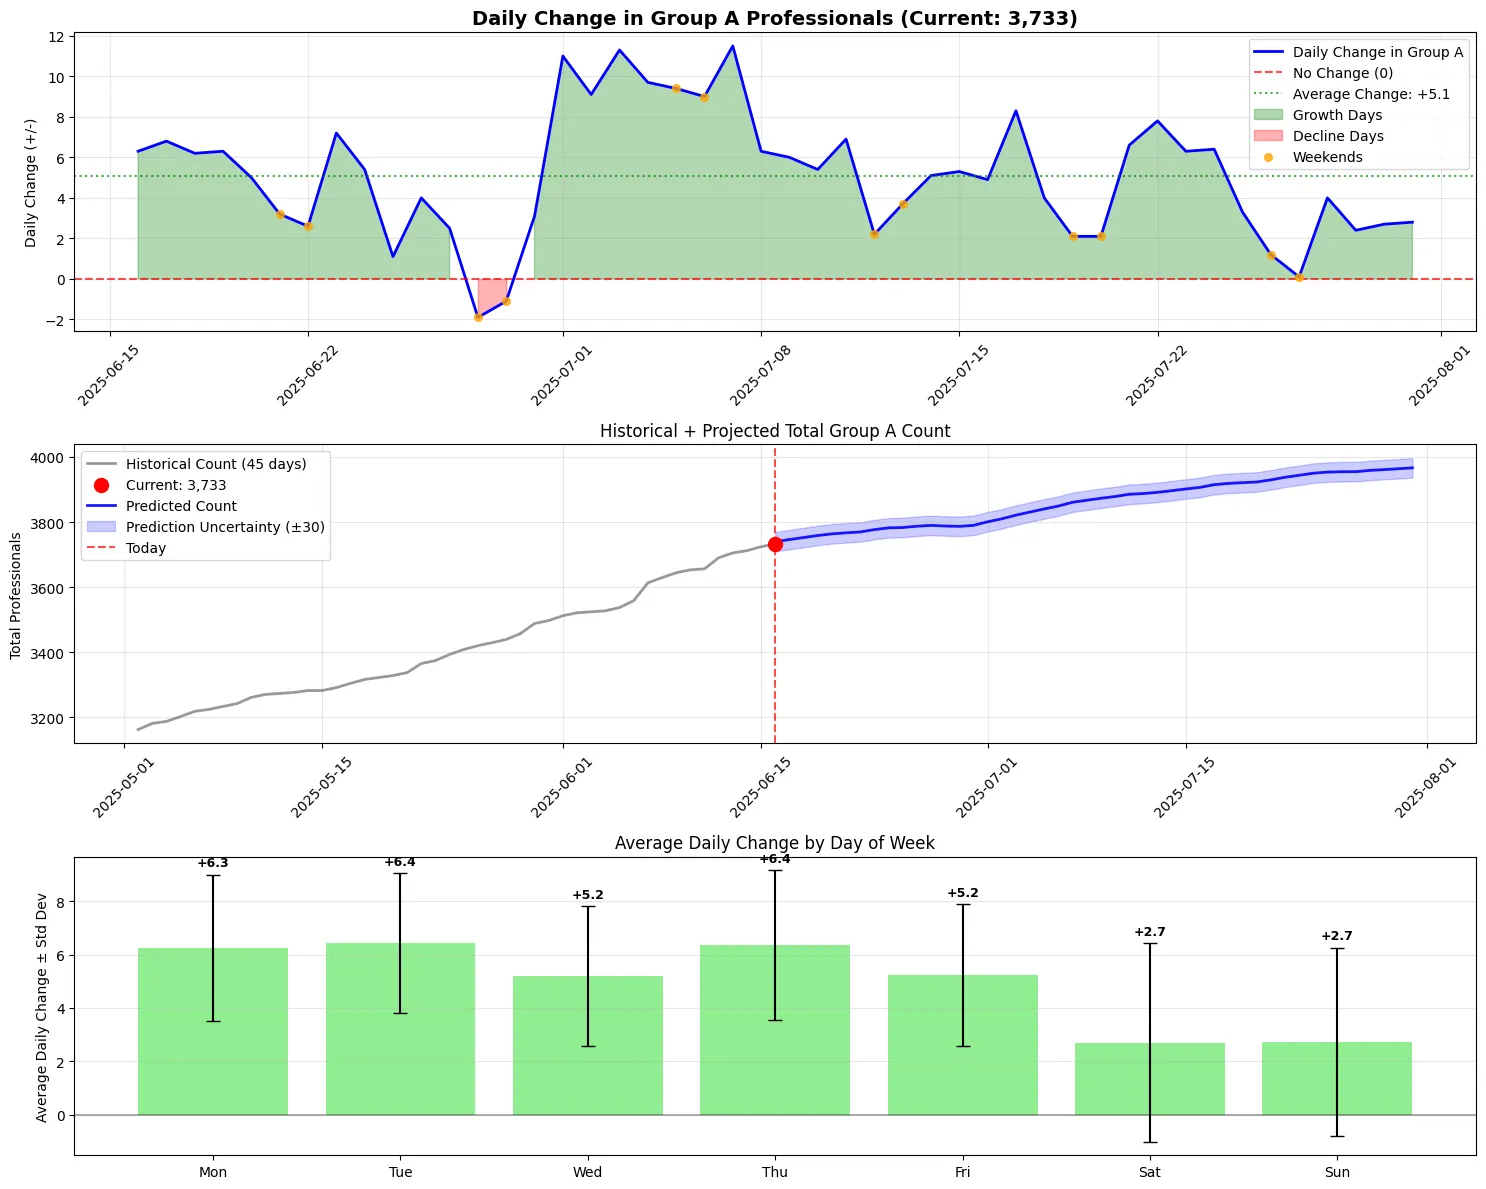